### Problem Statement

The client is facing a problem in identifying the right people for promotion (only for manager position and below) and prepare them in time.The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, the task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

#### Dataset Description

1. employee_id:	Unique ID for employee
2. department:	Department of employee
3. region:	Region of employment (unordered)
4. education:	Education Level
5. Gender:	Gender of Employee
6. recruitment_channel:	Channel of recruitment for employee
7. no_of_trainings:	no of other trainings completed in previous year on soft skills, technical skills etc.
8. age:	Age of Employee
9. previous_year_rating: Employee Rating for the previous year
10. length_of_service:	Length of service in years
11. KPIs_met>80%: if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
12. awards_won?: if awards won during previous year then 1 else 0
13. avg_training_score:	Average score in current training evaluations
14. is_promoted: (Target) Recommended for promotion

### Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Data exploration

In [4]:
# getting their shapes

print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


There is a combination of datatypes present in the data: int, float and object

Categorical features: .

Continous: employee_id,age,avg_training_score.

The target/dependent feature in our dataset is is_promoted , rest 13 fetaures are independent features

#### There are 14 features, looking into each of these features:

1. Employee_id: Each employee is provided a unique ID. Lets see how many unique employees we have in our dataset            

In [7]:
train.employee_id.value_counts()

2047     1
19228    1
4887     1
6934     1
789      1
        ..
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64

There are 54808 unique employees in our dataset and none of the value in this feature is null.

The feature has no impact on the outcome variable. So, it will be excluded from analysis.

2. Department: The various departments in which employees are there in the company.

In [8]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

It is categorical variable with 9 different categories. Sales & Marketing has the highest number of employees constituting 31% of the total employee strength.

3. Region: Region of employment contains various regions were the employees are working. These regions are present in unordered format.

In [9]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

4. Education: education level of the employee.

In [10]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

It is categorical variable with 3 different categories: Below Secondary,Bachelor's & Master's & above. 70% of the employees have Bachelor's degree.

5. Gender: gender is a categorical variables with 2 categories: Male and Female.

In [11]:
train.gender.value_counts()   

m    38496
f    16312
Name: gender, dtype: int64

There are twice as many male employees in the company as compared to the female employees.

6. recruitment_channel: Channel of recruitment for employee contains 3 categories: sourcing, referred and other.

In [12]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

7. no_of_trainings: no of other trainings the employee has completed in previous year on soft skills, technical skills etc.

In [13]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Each employee has undergone atleast a training in the previous year.The no of trainings undergone varies from 1 to 10. 

8. age: Age of the employee.

In [14]:
print("Age varies from: ",train.age.min(),'yrs to',train.age.max(),'yrs')

Age varies from:  20 yrs to 60 yrs


9. previous_year_rating: Employee Rating for the previous year. It is a categorical variable as there are rated on a scale of 1 to 5.

In [15]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

10. length_of_service : For how many years the employee has been working.

In [16]:
print("The years of employment varies from: ",train.length_of_service.min(),'yrs to',train.length_of_service.max(),'yrs')

The years of employment varies from:  1 yrs to 37 yrs


11. KPIs_met >80% : It is a categorical variable with 2 categories where 1 indicates those employees whose Key Performance Indicators was greater than 80% and 0 represents the rest.

In [17]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

12. awards_won: It is a categorical variable with 2 categories where 1 indicates a employee who has won an award and 0 represnts the rest.

In [18]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

Only 2.3% of the employees have won an award.

13. avg_training_score: Average score in current training evaluations.

In [19]:
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())

Average score ranges between:  39 to 99


14. is_promoted : This the target variable which helps in recommending if the employee is promoted with the help of all the above parameters.

It is a categorical variable with 2 values making this is binary classification problem 

In [20]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

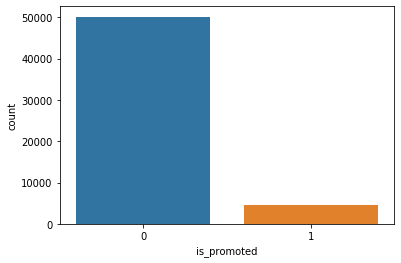

In [21]:
sns.countplot(train['is_promoted'])
plt.show()

Only 8.5% of the employees where promoted make it an imbalanced dataset.

### EDA

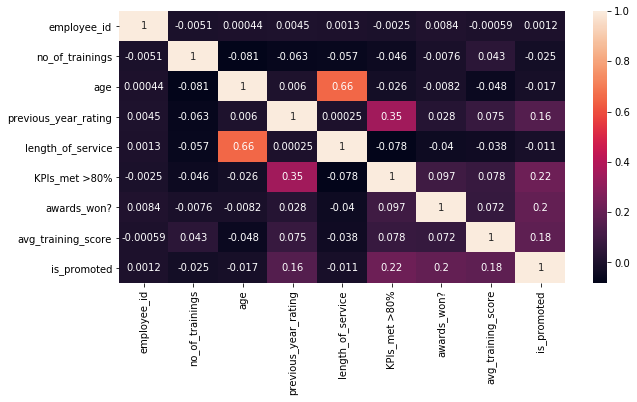

In [22]:
# Correlation matrix between numerical values

plt.figure(figsize=(10, 5))
cor = train.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable is not significantly correlated with other variables.

The age variable is highly correlated with the length of service.

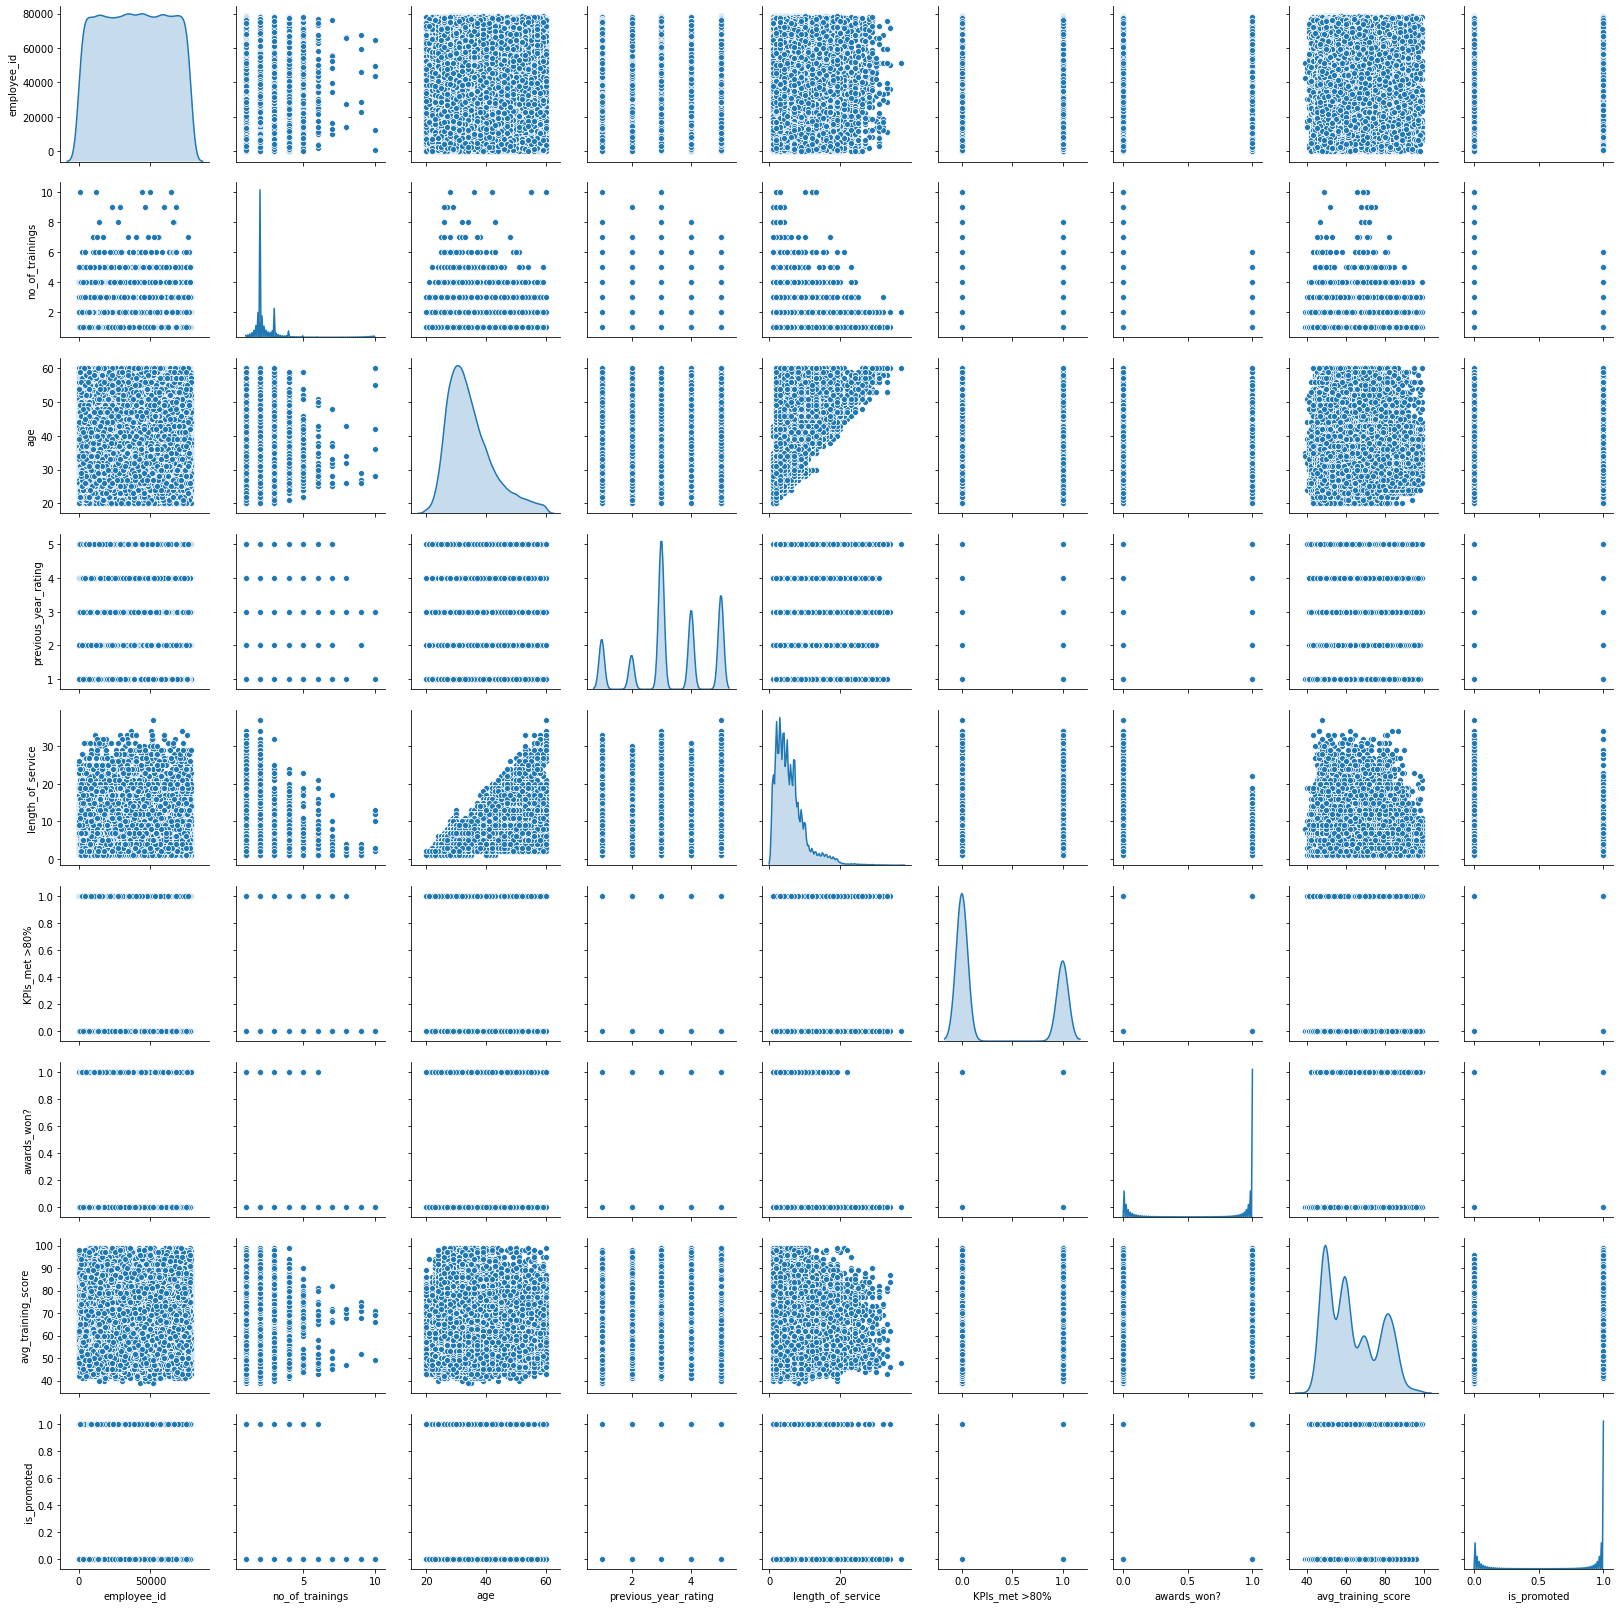

In [23]:
sns.pairplot(train,diag_kind='kde')
plt.show()

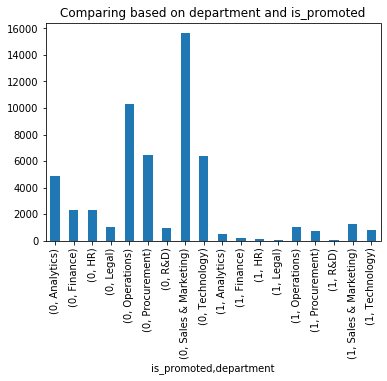

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


In [24]:
#A bar plot of is_promoted by Department

train.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess from each department who are promoted
d = train[train['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

The highest number of employees in the company were from Sales and Marketing and the highest %age of promoted employees are also from the same department.

After sales we can see that a significant number of employees have been promoted from Operations.

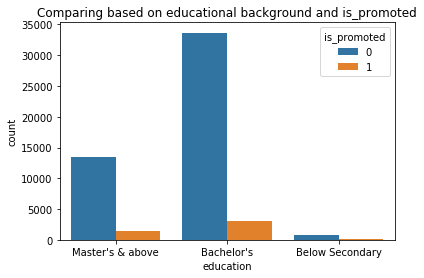

Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: education, dtype: float64

In [25]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
train[train['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

The highest number of employees in the company had completed Bachelor's education and the highest %age of promoted employees are also from the same educational background i.e 66%.

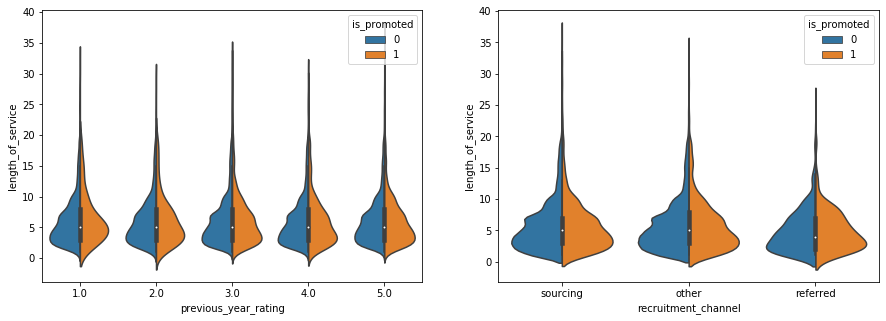

In [26]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# violinplot plot
sns.violinplot(x = 'previous_year_rating', y = 'length_of_service', data = train, hue = 'is_promoted', split = True, ax = axes[0])
sns.violinplot(x = 'recruitment_channel', y = 'length_of_service', data = train, hue = 'is_promoted', split = True, ax = axes[1])
plt.show()

On an average based on previous year of rating and recuritment channel the employees who have been promoted had the length of service between 3 to 5 yrs.

This may be because the promotions were only for manager position and below.

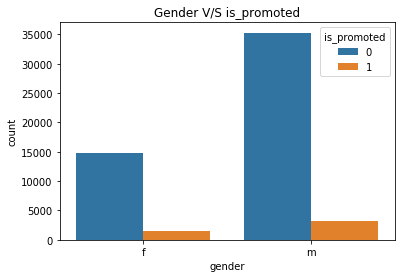

m    68.573265
f    31.426735
Name: gender, dtype: float64

In [27]:
# Gender V/S is_promoted

sns.countplot(x = 'gender', hue = 'is_promoted', data = train)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
train[train['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

68.5% of the males are promoted.

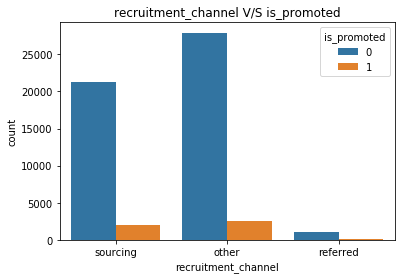

other       54.755784
sourcing    42.287918
referred     2.956298
Name: recruitment_channel, dtype: float64

In [28]:
# recruitment_channel V/S is_promoted

sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

train[train['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True) * 100

The employees who have been recruited from other channels are the one who have been promoted the most.

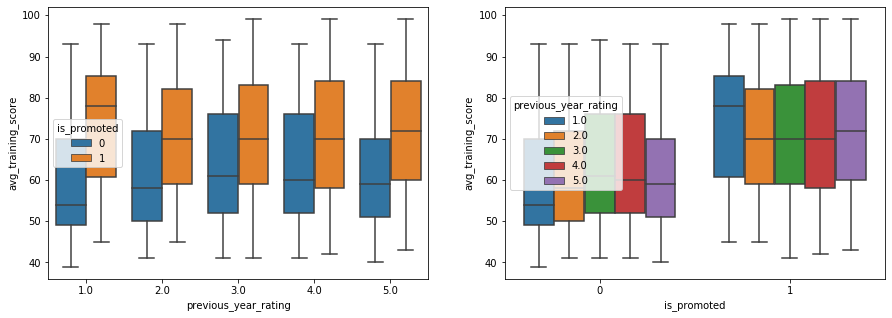

In [29]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train,hue='previous_year_rating', ax = axes[1])
plt.show()

From these boxplots we can clearly see that average training score has a significant impact on the promotion.

In each of the groups based on previous year rating the employee who has scored more in the training test has been promoted.

The employees who had the lowest previous have worked hard and scored greater score in the training and are the ones who have been promoted the most i.e the employees whose performance has increased from the previous year have been giving equal opportunities in promotion.

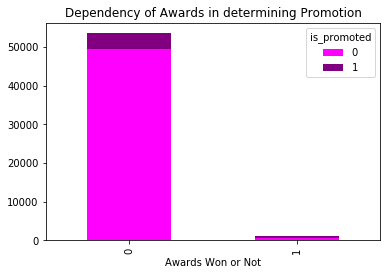

0    88.02485
1    11.97515
Name: awards_won?, dtype: float64

In [30]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

train[train['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

The people who have not won awards in the previous year are more in number and strangely 88% of these people have been promoted.

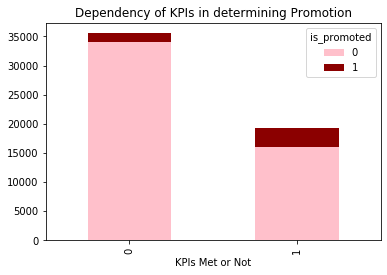

1    69.880034
0    30.119966
Name: KPIs_met >80%, dtype: float64


In [31]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(train[train['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

Having a good KPI score increases the chances of getting promoted in the company.

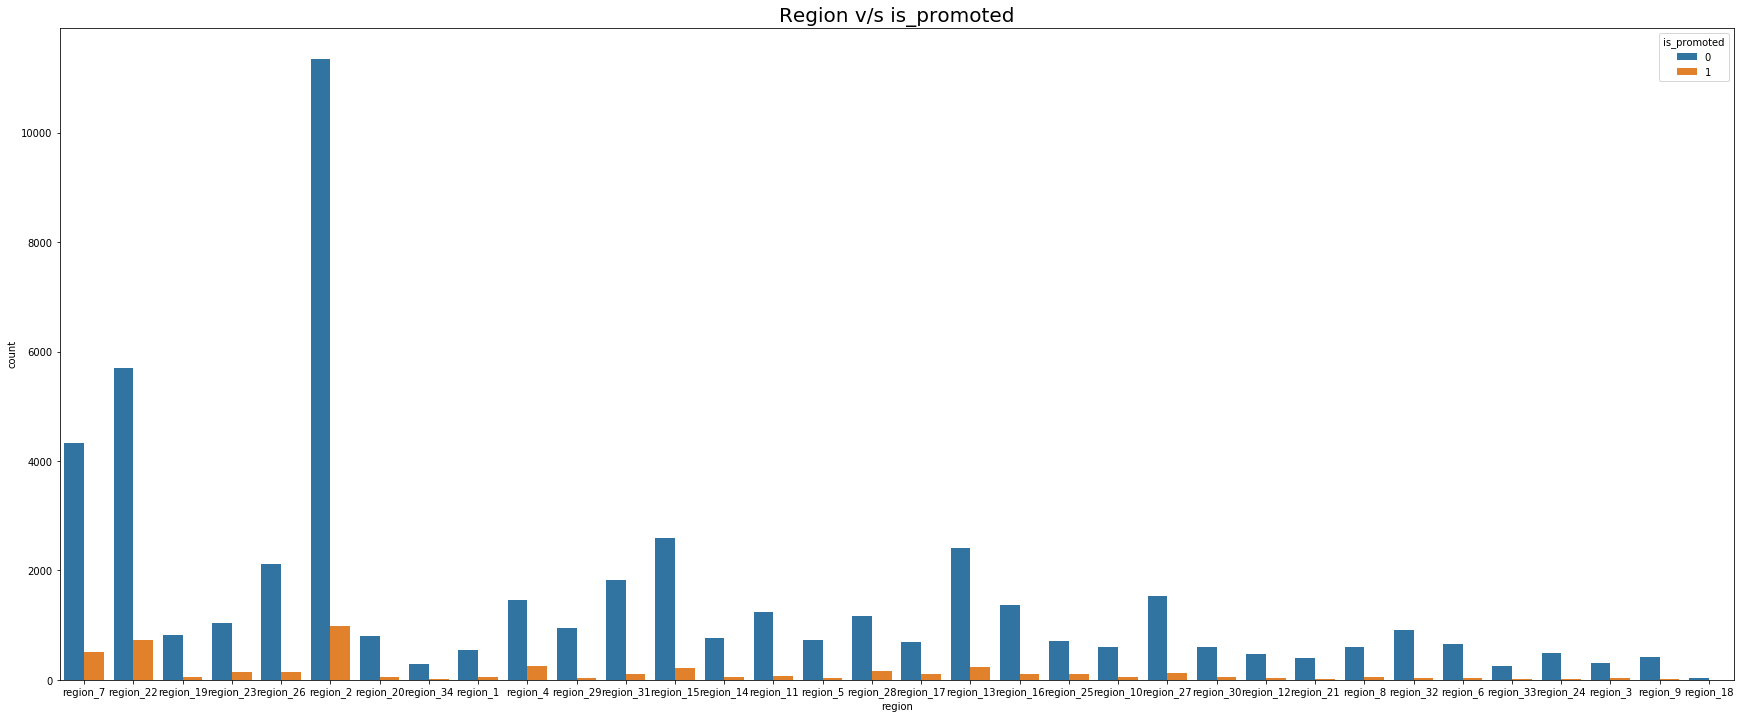

In [32]:
#Region and is_promoted

plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

Employees from region 2 and 22 have been promoted the most.

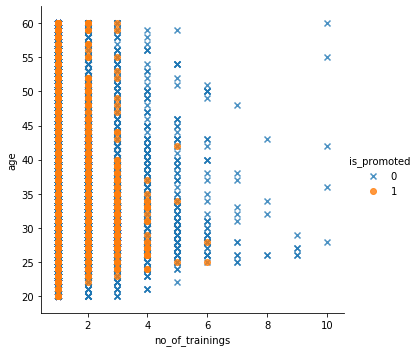

In [33]:
sns.lmplot(x='no_of_trainings',y='age',data=train,fit_reg=False,hue='is_promoted',markers=['x','o'])
plt.show()

The no of trainings and the employees promoted are inversely proportional.

Almost all the employees of various age groups have done around 3 trainings.

### Data preprocessing

In [275]:
# combining the data for data prep

test['is_promoted']=np.nan
train['data']='train'
test['data']='test'
test=test[train.columns]

combined = pd.concat([train,test], sort = False , ignore_index= True)

In [276]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [277]:
#Missing values

combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [278]:
combined.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [279]:
#filling in education with the maximum value(mode)

combined.education.fillna("Bachelor's",inplace=True)

In [280]:
combined.education.value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [281]:
combined.education.isna().sum()

0

In [282]:
combined.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [283]:
#filling in previous_year_rating with the median

combined.previous_year_rating.fillna(combined.previous_year_rating.median(),inplace=True)

In [284]:
combined.previous_year_rating.value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [285]:
combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [286]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               78298 non-null object
gender                  78298 non-null object
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    78298 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
data                    78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.0+ MB


In [287]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


### Encoding the data

#### Feature Hashing:
Feature hashing maps each category in a categorical feature to an integer within a pre-determined range. This output range is smaller than the input range so multiple categories may be mapped to the same integer. Feature hashing is very similar to one-hot encoding but with a control over the output dimensions.

To implement feature hashing in python we can use category_encoder, a library containing sklearn compabitable category encoders.

In [288]:
#Feature hashing region

unique_region = np.unique(combined[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [289]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(combined['region'])
hashed_features = hashed_features.toarray()
hashed_features = pd.DataFrame(hashed_features)
print(hashed_features)
combined = pd.concat((combined, hashed_features),axis=1)

         0    1    2    3    4    5
0     -1.0  3.0  0.0  0.0  0.0  0.0
1     -1.0  3.0 -1.0  2.0  0.0  0.0
2     -1.0  2.0 -1.0  0.0  0.0  1.0
3      0.0  3.0 -1.0  1.0  0.0  0.0
4     -1.0  3.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
78293 -1.0  3.0 -1.0  1.0  0.0  0.0
78294  0.0  3.0 -1.0  1.0  0.0  0.0
78295 -1.0  2.0  0.0  0.0  0.0  0.0
78296  0.0  2.0 -1.0  0.0  0.0  0.0
78297 -1.0  2.0  0.0  0.0  0.0  0.0

[78298 rows x 6 columns]


In [290]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [291]:
combined.drop('region',axis=1,inplace=True)

In [292]:
#encoding gender and education

combined['gender'] = combined['gender'].map( {'f': 0, 'm': 1} ).astype(int)  

combined['education'] = combined['education'].map( {'Below Secondary': 0, 'Bachelor\'s': 1, 'Master\'s & above': 2} ).astype(int)


In [293]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,Sales & Marketing,2,0,sourcing,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,1,1,other,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,1,1,sourcing,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,1,1,other,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,1,1,other,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [294]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('department').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['department'] = combined.department.map(encoding)

In [295]:
#Frequency Encoding

# size of each category
encoding = combined.groupby('recruitment_channel').size()

# get frequency of each category
encoding = encoding/len(combined)

combined['recruitment_channel'] = combined.recruitment_channel.map(encoding)

In [296]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5.0,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5.0,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3.0,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1.0,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3.0,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [297]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 20 columns):
employee_id             78298 non-null int64
department              78298 non-null float64
education               78298 non-null int32
gender                  78298 non-null int32
recruitment_channel     78298 non-null float64
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    78298 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
data                    78298 non-null object
0                       78298 non-null float64
1                       78298 non-null float64
2                       78298 non-null float64
3                       78298 non-null float64
4                       78298 non-null float64
5                

In [298]:
combined['previous_year_rating'] = combined['previous_year_rating'].astype(int)

In [299]:
combined.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data,0,1,2,3,4,5
0,65438,0.308501,2,0,0.423778,1,35,5,8,1,0,49,0.0,train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,0.205778,1,1,0.555876,1,30,5,4,0,0,60,0.0,train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,0.308501,1,1,0.423778,1,34,3,7,0,0,50,0.0,train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,0.308501,1,1,0.555876,2,39,1,10,0,0,50,0.0,train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,0.129620,1,1,0.555876,1,45,3,2,0,0,73,0.0,train,-1.0,3.0,0.0,1.0,0.0,0.0


In [300]:
#splitting the data back into train and test as it was already provided

train = combined[combined['data']=='train']
train.drop(['data','employee_id'],axis=1,inplace=True)

test = combined[combined['data']=='test']
submit = test['employee_id']
test.drop(['is_promoted','data','employee_id'],axis=1,inplace=True)

del combined

In [301]:
print(train.shape)
print(test.shape)

(54808, 18)
(23490, 17)


In [302]:
#For submission

submission = pd.DataFrame()
submission['employee_id'] = submit
submission['is_promoted'] = np.nan

In [303]:
train["is_promoted"] = train["is_promoted"].astype(int)

y = train["is_promoted"]
X = train.drop(labels = ["is_promoted"],axis = 1)

### Data imbalance treatment

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.One way to solve this problem is to oversample the examples in the minority class.

SMOTE(Synthetic Minority Oversampling TEchnique) works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [304]:
#Oversampling of the Model

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(X, y.values.ravel())

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

print("\nAfter OverSampling, counts of label '1': {}".format(sum(y_sample == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sample == 0))) 

X = pd.DataFrame(x_sample,columns=X.columns)
y = pd.DataFrame(y_sample)

Before OverSampling, counts of label '1': 4668
Before OverSampling, counts of label '0': 50140 

Size of x-sample : (100280, 17)
Size of y-sample : (100280,)

After OverSampling, counts of label '1': 50140
After OverSampling, counts of label '0': 50140


In [229]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (70196, 17)
Shape of x_valid:  (30084, 17)
Shape of y_train:  (70196, 1)
Shape of y_valid:  (30084, 1)


In [230]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
test = sc.transform(test)

### Model building

#### Linear Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

In [67]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 0.7305544475468687


In [68]:
f1_score(y_test, y_test_pred, zero_division=1)

0.7360125056992118

#### Decision Tree

Hyperparameter Tuning

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118D073E08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118D07D408>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118D073F88>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [70]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 11}

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.8962049119607954
0.9695633318955417


0.8918029517351416
0.9647820139772583


In [72]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.282691
department,0.280136
recruitment_channel,0.134804
KPIs_met >80%,0.100967
0,0.043585
previous_year_rating,0.042405
3,0.036382
1,0.035984
2,0.026496
age,0.004974


In [136]:
# Feature selection (Dropping insignificant features)

X_new = X[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating',
           'length_of_service','KPIs_met >80%','avg_training_score',0,1,2,3]]
y_new = y

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118C985348>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118895BF88>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000111889AD748>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [140]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 8}

In [141]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9033563165992364
0.9736642793556114


0.8975535168195719
0.968889743076233


In [143]:
test_new = test[['department','recruitment_channel','no_of_trainings', 'age','previous_year_rating',
           'length_of_service','KPIs_met >80%','avg_training_score',0,1,2,3]]

In [145]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=X_new.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.287090
department,0.267465
recruitment_channel,0.135223
KPIs_met >80%,0.103570
1,0.047892
3,0.043751
previous_year_rating,0.042424
0,0.039302
age,0.011011
2,0.009858


In [231]:
# Feature selection (Dropping insignificant features)

X_new2 = X[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score',0,1,3]]
y_new2 = y

In [148]:
#Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new2,y_new2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118D1ACD08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118CD2E048>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001118E5506C8>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [149]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 8}

In [150]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_new2,y_new2,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9055929112769958
0.9727429654235812


0.9018415104374419
0.9688280995388241


In [153]:
test_new2 = test[['department','recruitment_channel', 'age','previous_year_rating','KPIs_met >80%','avg_training_score',0,1,3]]

In [156]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9914240127642601
0.9996709185762775


0.9514359792580774
0.9867392188082783


In [167]:
#LightGBM

import lightgbm as lgb

lgbc = lgb.LGBMClassifier(random_state=3)

lgbc.fit(X_train,y_train)

y_train_pred = lgbc.predict(X_train)
y_train_prob = lgbc.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = lgbc.predict(X_test)
y_test_prob = lgbc.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9375747905863582
0.9871833961572936


0.9378074724105837
0.9857418464825631


In [174]:
## catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(X_train,y_train)

y_train_pred = cat.predict(X_train)
y_train_prob = cat.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = cat.predict(X_test)
y_test_prob = cat.predict_proba(X_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

Learning rate set to 0.063286
0:	learn: 0.6465065	total: 329ms	remaining: 5m 29s
1:	learn: 0.6140901	total: 365ms	remaining: 3m 2s
2:	learn: 0.5638848	total: 401ms	remaining: 2m 13s
3:	learn: 0.5363634	total: 435ms	remaining: 1m 48s
4:	learn: 0.5150996	total: 470ms	remaining: 1m 33s
5:	learn: 0.5002169	total: 504ms	remaining: 1m 23s
6:	learn: 0.4825396	total: 551ms	remaining: 1m 18s
7:	learn: 0.4527074	total: 594ms	remaining: 1m 13s
8:	learn: 0.4249809	total: 631ms	remaining: 1m 9s
9:	learn: 0.4043683	total: 677ms	remaining: 1m 7s
10:	learn: 0.3881854	total: 719ms	remaining: 1m 4s
11:	learn: 0.3767638	total: 762ms	remaining: 1m 2s
12:	learn: 0.3615784	total: 799ms	remaining: 1m
13:	learn: 0.3470451	total: 839ms	remaining: 59.1s
14:	learn: 0.3346758	total: 874ms	remaining: 57.4s
15:	learn: 0.3263106	total: 929ms	remaining: 57.1s
16:	learn: 0.3164011	total: 969ms	remaining: 56s
17:	learn: 0.3102128	total: 1s	remaining: 54.8s
18:	learn: 0.3018916	total: 1.04s	remaining: 53.8s
19:	learn: 0

163:	learn: 0.1629270	total: 6.97s	remaining: 35.5s
164:	learn: 0.1628223	total: 7.02s	remaining: 35.5s
165:	learn: 0.1627190	total: 7.06s	remaining: 35.5s
166:	learn: 0.1626036	total: 7.09s	remaining: 35.4s
167:	learn: 0.1624502	total: 7.13s	remaining: 35.3s
168:	learn: 0.1622845	total: 7.18s	remaining: 35.3s
169:	learn: 0.1620259	total: 7.22s	remaining: 35.3s
170:	learn: 0.1617750	total: 7.26s	remaining: 35.2s
171:	learn: 0.1616877	total: 7.3s	remaining: 35.1s
172:	learn: 0.1614364	total: 7.33s	remaining: 35.1s
173:	learn: 0.1609035	total: 7.38s	remaining: 35s
174:	learn: 0.1602994	total: 7.43s	remaining: 35s
175:	learn: 0.1601779	total: 7.48s	remaining: 35s
176:	learn: 0.1600457	total: 7.52s	remaining: 35s
177:	learn: 0.1599822	total: 7.56s	remaining: 34.9s
178:	learn: 0.1598316	total: 7.6s	remaining: 34.9s
179:	learn: 0.1596815	total: 7.65s	remaining: 34.8s
180:	learn: 0.1593702	total: 7.69s	remaining: 34.8s
181:	learn: 0.1592548	total: 7.73s	remaining: 34.7s
182:	learn: 0.1590003	

322:	learn: 0.1435178	total: 13.6s	remaining: 28.5s
323:	learn: 0.1432150	total: 13.7s	remaining: 28.5s
324:	learn: 0.1430690	total: 13.8s	remaining: 28.6s
325:	learn: 0.1430077	total: 13.8s	remaining: 28.6s
326:	learn: 0.1429579	total: 13.9s	remaining: 28.5s
327:	learn: 0.1428186	total: 13.9s	remaining: 28.5s
328:	learn: 0.1426457	total: 13.9s	remaining: 28.4s
329:	learn: 0.1425654	total: 14s	remaining: 28.4s
330:	learn: 0.1423839	total: 14s	remaining: 28.3s
331:	learn: 0.1422736	total: 14.1s	remaining: 28.3s
332:	learn: 0.1421005	total: 14.1s	remaining: 28.3s
333:	learn: 0.1420436	total: 14.2s	remaining: 28.2s
334:	learn: 0.1419838	total: 14.2s	remaining: 28.2s
335:	learn: 0.1419496	total: 14.3s	remaining: 28.2s
336:	learn: 0.1419167	total: 14.3s	remaining: 28.1s
337:	learn: 0.1417843	total: 14.3s	remaining: 28.1s
338:	learn: 0.1416850	total: 14.4s	remaining: 28.1s
339:	learn: 0.1416482	total: 14.5s	remaining: 28.1s
340:	learn: 0.1416122	total: 14.5s	remaining: 28s
341:	learn: 0.1415

482:	learn: 0.1338412	total: 20.9s	remaining: 22.4s
483:	learn: 0.1337738	total: 20.9s	remaining: 22.3s
484:	learn: 0.1336694	total: 21s	remaining: 22.3s
485:	learn: 0.1336312	total: 21s	remaining: 22.2s
486:	learn: 0.1335437	total: 21s	remaining: 22.2s
487:	learn: 0.1335110	total: 21.1s	remaining: 22.1s
488:	learn: 0.1334769	total: 21.1s	remaining: 22.1s
489:	learn: 0.1334239	total: 21.2s	remaining: 22s
490:	learn: 0.1333574	total: 21.2s	remaining: 22s
491:	learn: 0.1333020	total: 21.2s	remaining: 21.9s
492:	learn: 0.1332511	total: 21.3s	remaining: 21.9s
493:	learn: 0.1332097	total: 21.3s	remaining: 21.9s
494:	learn: 0.1331770	total: 21.4s	remaining: 21.8s
495:	learn: 0.1331463	total: 21.4s	remaining: 21.8s
496:	learn: 0.1330762	total: 21.5s	remaining: 21.7s
497:	learn: 0.1330428	total: 21.5s	remaining: 21.7s
498:	learn: 0.1329714	total: 21.6s	remaining: 21.6s
499:	learn: 0.1329253	total: 21.6s	remaining: 21.6s
500:	learn: 0.1328593	total: 21.6s	remaining: 21.6s
501:	learn: 0.1328448	

641:	learn: 0.1272386	total: 27.4s	remaining: 15.3s
642:	learn: 0.1272124	total: 27.5s	remaining: 15.3s
643:	learn: 0.1271707	total: 27.5s	remaining: 15.2s
644:	learn: 0.1271027	total: 27.6s	remaining: 15.2s
645:	learn: 0.1270655	total: 27.6s	remaining: 15.1s
646:	learn: 0.1270433	total: 27.6s	remaining: 15.1s
647:	learn: 0.1270202	total: 27.7s	remaining: 15s
648:	learn: 0.1269923	total: 27.7s	remaining: 15s
649:	learn: 0.1269607	total: 27.8s	remaining: 15s
650:	learn: 0.1269273	total: 27.8s	remaining: 14.9s
651:	learn: 0.1268943	total: 27.8s	remaining: 14.9s
652:	learn: 0.1268642	total: 27.9s	remaining: 14.8s
653:	learn: 0.1268188	total: 27.9s	remaining: 14.8s
654:	learn: 0.1267930	total: 28s	remaining: 14.7s
655:	learn: 0.1267599	total: 28s	remaining: 14.7s
656:	learn: 0.1267302	total: 28s	remaining: 14.6s
657:	learn: 0.1267068	total: 28.1s	remaining: 14.6s
658:	learn: 0.1266889	total: 28.1s	remaining: 14.5s
659:	learn: 0.1266705	total: 28.2s	remaining: 14.5s
660:	learn: 0.1266338	to

803:	learn: 0.1220116	total: 34.7s	remaining: 8.45s
804:	learn: 0.1219885	total: 34.7s	remaining: 8.41s
805:	learn: 0.1219660	total: 34.8s	remaining: 8.36s
806:	learn: 0.1219518	total: 34.8s	remaining: 8.32s
807:	learn: 0.1218894	total: 34.8s	remaining: 8.28s
808:	learn: 0.1218375	total: 34.9s	remaining: 8.24s
809:	learn: 0.1217904	total: 34.9s	remaining: 8.2s
810:	learn: 0.1217499	total: 35s	remaining: 8.16s
811:	learn: 0.1217111	total: 35s	remaining: 8.12s
812:	learn: 0.1216910	total: 35.1s	remaining: 8.07s
813:	learn: 0.1216678	total: 35.1s	remaining: 8.03s
814:	learn: 0.1216562	total: 35.2s	remaining: 7.99s
815:	learn: 0.1216302	total: 35.2s	remaining: 7.95s
816:	learn: 0.1215585	total: 35.3s	remaining: 7.91s
817:	learn: 0.1215109	total: 35.3s	remaining: 7.86s
818:	learn: 0.1214758	total: 35.4s	remaining: 7.82s
819:	learn: 0.1214607	total: 35.4s	remaining: 7.77s
820:	learn: 0.1214121	total: 35.5s	remaining: 7.73s
821:	learn: 0.1214028	total: 35.5s	remaining: 7.69s
822:	learn: 0.121

963:	learn: 0.1176827	total: 41.3s	remaining: 1.54s
964:	learn: 0.1176641	total: 41.4s	remaining: 1.5s
965:	learn: 0.1176463	total: 41.4s	remaining: 1.46s
966:	learn: 0.1176123	total: 41.4s	remaining: 1.41s
967:	learn: 0.1175872	total: 41.5s	remaining: 1.37s
968:	learn: 0.1175571	total: 41.5s	remaining: 1.33s
969:	learn: 0.1175390	total: 41.6s	remaining: 1.28s
970:	learn: 0.1174854	total: 41.6s	remaining: 1.24s
971:	learn: 0.1174722	total: 41.6s	remaining: 1.2s
972:	learn: 0.1174471	total: 41.7s	remaining: 1.16s
973:	learn: 0.1174383	total: 41.7s	remaining: 1.11s
974:	learn: 0.1174120	total: 41.8s	remaining: 1.07s
975:	learn: 0.1174039	total: 41.8s	remaining: 1.03s
976:	learn: 0.1173705	total: 41.8s	remaining: 985ms
977:	learn: 0.1173416	total: 41.9s	remaining: 942ms
978:	learn: 0.1173144	total: 41.9s	remaining: 899ms
979:	learn: 0.1172997	total: 42s	remaining: 856ms
980:	learn: 0.1172723	total: 42s	remaining: 813ms
981:	learn: 0.1172640	total: 42s	remaining: 770ms
982:	learn: 0.117247

In [268]:
##XGBoost

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_train_prob = xgb.predict_proba(X_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = xgb.predict(X_test)
y_test_prob = xgb.predict_proba(X_test)[:,1]

print('\n')
print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9469912815545045
0.9910421886882446


0.9406993750831006
0.9867137106042164


In [269]:
imp = pd.DataFrame(xgb.feature_importances_,index=X_new2.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
recruitment_channel,0.216567
KPIs_met >80%,0.150973
0,0.136324
department,0.134732
1,0.123450
3,0.106108
avg_training_score,0.070356
previous_year_rating,0.052947
age,0.008543
